#### Problem with perceptron 

##### Problem with Perceptron Trick: Updating Only Misclassified Points  

In the Perceptron algorithm, we update weights only when a point is misclassified:

$$
y_i (w^T x_i) \le 0
$$

That means:

- If a point is wrongly classified → we update.
- If a point is correctly classified → we do nothing.

So the decision boundary is influenced **only by misclassified points**.

---

##### What If We Also Update Using Correctly Classified Points?

Suppose we decide to update for all points:

$$
w = w + \eta y_i x_i
$$

even when the point is correctly classified.

What would happen?

- Correct positive points would keep pulling the boundary toward themselves.
- Correct negative points would keep pushing it away.
- The boundary would continuously drift.
- The model may never stabilize.

There would be no stopping condition.

---

##### Why Perceptron Uses Only Misclassified Points  

Perceptron solves a constraint satisfaction problem:

$$
y_i (w^T x_i) > 0
$$

Once a point satisfies this condition, it imposes no further constraint.

So correctly classified points have zero influence.

This makes perceptron a **feasibility-based algorithm**, not an optimization-based one.

---

##### The Core Limitation  

Because perceptron:

- Uses a hard threshold (sign function)
- Has no notion of confidence
- Has no margin concept
- Does not minimize a smooth loss

It can only find *a* separating hyperplane, not necessarily the best one.

---

##### What If We Introduce Margin?

If instead we update when:

$$
y_i (w^T x_i) < 1
$$

Now even correctly classified points close to the boundary can influence the update.

This introduces a margin concept.

At this point, we are no longer doing standard perceptron.

We are moving toward **margin-based methods (like SVM)**.

---

##### Final Insight  

Perceptron:
- Cares only about the sign.
- Updates only on mistakes.
- Stops once no mistakes remain.

Logistic Regression:
- Updates based on probability confidence.
- Minimizes a smooth loss function.

SVM:
- Maximizes the margin explicitly.

That is the evolution from geometric correction → probabilistic optimization → margin maximization.

_____________

______________

$$
w_n = w_0 + \eta (y_i - \hat{y}_i) x_i
$$

| $y_i$ | $\hat{y}_i$ | $y_i - \hat{y}_i$ |
|-------|-------------|-------------------|
| 1     | 1           | 0                 |
| 0     | 0           | 0                 |
| 1     | 0           | 1                 |
| 0     | 1           | -1                |

In [2]:
# above is the old perceptron trick

##### From Perceptron Update to Sigmoid Function  

In the perceptron update rule:

$$
w = w + \eta (y_i - \hat{y}_i) x_i
$$

We observe that learning stops when:

$$
y_i - \hat{y}_i = 0
$$

This happens when the prediction exactly matches the true label.

---

##### The Line Equation  

The decision boundary is:

$$
w_1 x_1 + w_2 x_2 + w_0 = 0
$$

Or in summation form:

$$
\sum_{i=0}^{n} w_i x_i = 0
$$

Prediction in perceptron is obtained using a step function:

$$
\hat{y}_i = \text{sign}(w^T x_i)
$$

This produces outputs only in:

$$
\{0, 1\}
$$

---

##### The Limitation  

Because the output is strictly 0 or 1:

- There is no notion of confidence.
- The update happens abruptly.
- Once correctly classified, the point has no further influence.
- The model cannot measure *how correct* a prediction is.

To improve this, we need a function that:

- Converts the linear output \( w^T x \)
- Into a smooth value between 0 and 1
- Represents probability instead of a hard decision

---
### Sigmoid Function
##### Here Comes the Sigmoid Function  

We replace the step function with the sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

$$
z = w^T x
$$

Now the prediction becomes:

$$
\hat{y}_i = \sigma(w^T x_i)
$$

This produces outputs in:

$$
(0, 1)
$$

Instead of hard 0 or 1, we now get a probability.

---

##### Why This Is Important  

With sigmoid:

- Even correctly classified points contribute to learning.
- Updates become smooth.
- The model minimizes a continuous loss.
- We move from geometric correction (perceptron)  
  to probabilistic optimization (logistic regression).

This is the transition from Perceptron to Logistic Regression.

##### Behavior of the Sigmoid Function  

In logistic regression, we compute:

$$
z = w^T x
$$

and pass it through the sigmoid function:

$$
y = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

##### Case 1: When $z$ is Large and Positive  

If:

$$
z \gg 0
$$

then:

$$
e^{-z} \to 0
$$

So,

$$
y \to 1
$$

This means the model is very confident that the class is 1.

---

##### Case 2: When $z$ is Large and Negative  

If:

$$
z \ll 0
$$

then:

$$
e^{-z} \to \infty
$$

So,

$$
y \to 0
$$

This means the model is very confident that the class is 0.

---

##### Case 3: When $z = 0$  

If:

$$
z = 0
$$

then:

$$
y = \frac{1}{1 + e^{0}} = \frac{1}{2} = 0.5
$$

This represents complete uncertainty.

---

##### Interpretation  

- Large positive $z$ → prediction close to 1  
- Large negative $z$ → prediction close to 0  
- $z = 0$ → decision boundary (probability = 0.5)  

The sigmoid function smoothly maps any real number into a probability between 0 and 1.

##### for example

For a given data point (for example, CGPA = 7.5 and IQ = 81),  
we first compute the linear combination:

$$
z = w_1 \cdot 7.5 + w_2 \cdot 81 + w_0
$$

In general form:

$$
z = \sum_{i=0}^{n} w_i x_i
$$

This is simply the weighted sum of input features.

---

##### From Linear Score to Prediction  

Instead of directly using this value for classification,  
we pass it through the sigmoid function:

$$
\hat{y}_i = \sigma(z)
$$

where

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

So the complete flow becomes:

$$
\sum w_i x_i \; \longrightarrow \; z \; \longrightarrow \; \sigma(z)
$$

---

##### Interpretation  

- The expression $$ \sum w_i x_i $$ gives the raw score (log-odds).
- Applying $$ \sigma(z) $$ converts that score into a probability.
- The final output $$ \hat{y}_i $$ lies between 0 and 1.

This is the key difference between perceptron and logistic regression:
Perceptron uses a step function, while logistic regression uses the sigmoid function.

##### Sigmoid in Probability Terms  

In logistic regression, we model the probability of a class given input features.

First, compute the linear score:

$$
z = w^T x = \sum_{i=0}^{n} w_i x_i
$$

Instead of directly classifying using the sign of $z$,  
we interpret $z$ as **log-odds**.

---

##### Log-Odds Interpretation  

We assume:

$$
\log \left( \frac{P(y=1 \mid x)}{P(y=0 \mid x)} \right) = z
$$

This means:

$$
\log \left( \frac{p}{1-p} \right) = z
$$

where:

$$
p = P(y=1 \mid x)
$$

---

##### Converting Log-Odds to Probability  

Exponentiating both sides:

$$
\frac{p}{1-p} = e^{z}
$$

Solving for $p$:

$$
p = \frac{e^{z}}{1 + e^{z}}
$$

Which simplifies to the sigmoid function:

$$
p = \frac{1}{1 + e^{-z}}
$$

---

##### Final Interpretation  

The sigmoid function gives:

$$
P(y=1 \mid x) = \sigma(w^T x)
$$

And:

$$
P(y=0 \mid x) = 1 - \sigma(w^T x)
$$

So sigmoid is not just a mathematical trick —  
it converts a linear model of log-odds into a valid probability between 0 and 1.

### Impact of Sigmoid 

##### Weight Update Rule  

$$
w_n = w_0 + \eta (y_i - \hat{y}_i) x_i
$$

---

##### Prediction Using Sigmoid  

$$
\hat{y}_i = \sigma(z)
$$

where

$$
z = \sum_{i=0}^{n} w_i x_i
$$

we have four random points : 
| $y_i$ | $\hat{y}_i$ | $y_i - \hat{y}_i$ |
|-------|-------------|-------------------|
| 1     | 0.8         | 0.2               |
| 0     | 0.65        | -0.65             |
| 1     | 0.3         | 0.7               |
| 0     | 0.15        | -0.15             |

> here we can see none of the value is exactly zero

##### magnitude of pulling and pushing the line depends on how far or close the point is 

##### Magnitude of Pulling and Pushing Depends on Confidence  

In logistic regression, the weight update rule is:

$$
w = w + \eta (y_i - \hat{y}_i) x_i
$$

The term:

$$
(y_i - \hat{y}_i)
$$

determines the **magnitude and direction** of the update.

---

##### Case 1: Point is Correct and Confident  

Example:

$$
y_i = 1, \quad \hat{y}_i = 0.95
$$

Then:

$$
y_i - \hat{y}_i = 0.05
$$

The update is very small.

The model is already confident, so only a slight adjustment is needed.

---

##### Case 2: Point is Wrong and Far from Boundary  

Example:

$$
y_i = 1, \quad \hat{y}_i = 0.1
$$

Then:

$$
y_i - \hat{y}_i = 0.9
$$

The update is large.

The model is confidently wrong, so it strongly pulls the decision boundary.

---

##### Interpretation  

- If the prediction is close to the true label → small update.
- If the prediction is far from the true label → large update.
- Misclassified points cause stronger corrections.
- Correct but uncertain points still influence learning.

---

 

Unlike the perceptron (which updates only on mistakes),  
logistic regression adjusts the boundary smoothly.

The farther a point is from the correct probability,  
the stronger it pulls or pushes the line.

## Code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [4]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=1.0,
    random_state=2
)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_bias = np.insert(X, 0, 1, axis=1)

In [7]:
def perceptron(X, y, epochs=2000, lr=0.1):
    w = np.ones(X.shape[1])
    
    for _ in range(epochs):
        for i in range(X.shape[0]):
            z = np.dot(X[i], w)
            y_hat = 1 if z >= 0 else 0
            
            if y[i] != y_hat:
                w += lr * (y[i] - y_hat) * X[i]
                
    return w

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_gd(X, y, epochs=2000, lr=0.1):
    w = np.ones(X.shape[1])
    
    for _ in range(epochs):
        for i in range(X.shape[0]):
            z = np.dot(X[i], w)
            y_hat = sigmoid(z)
            w += lr * (y[i] - y_hat) * X[i]
            
    return w

In [9]:
w_perc = perceptron(X_bias, y)
w_log = logistic_gd(X_bias, y)

In [10]:
def get_line_params(w):
    m = -(w[1] / w[2])
    b = -(w[0] / w[2])
    return m, b

In [11]:
m_p, b_p = get_line_params(w_perc)
m_l, b_l = get_line_params(w_log)

In [12]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
x_vals = np.linspace(x_min, x_max, 200)

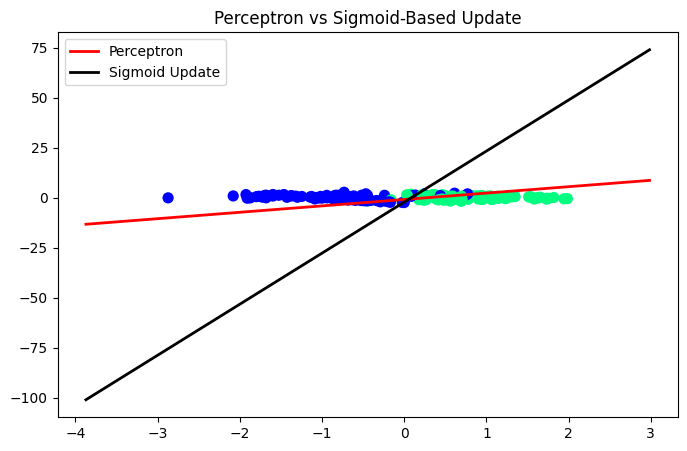

In [13]:
plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)

plt.plot(x_vals, m_p*x_vals + b_p, 'r-', linewidth=2, label="Perceptron")
plt.plot(x_vals, m_l*x_vals + b_l, 'k-', linewidth=2, label="Sigmoid Update")

plt.legend()
plt.title("Perceptron vs Sigmoid-Based Update")
plt.show()